# Dominos Store - Delivery Time Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv('/content/dominos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


Understanding the data

In [3]:
df.shape # number of rows & columns

(15000, 3)

In [5]:
df.columns # Column names

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [6]:
df.info() # data types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


This helps us understand:
- How big the dataset is?
- Which columns exist
- Whether data cleaning is required

Data Cleaning

Checking Missing Values

In [7]:
df.isna().sum()

,0
order_id,0
order_placed_at,0
order_delivered_at,0


In [8]:
# If missing values exist, remove them
# df.dropna(inplace = True)

 Convert Date Columns to Datetime
- Our columns are timestamps, so convert them properly.

In [9]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [10]:
df.dtypes

,0
order_id,int64
order_placed_at,datetime64[ns]
order_delivered_at,datetime64[ns]


Calculate Delivert Time
- SLA is based on delivery time in minutes, not timestamps

In [12]:
df['delivery_time'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

df['delivery_time']

,delivery_time
0,17.140719
1,15.598754
2,15.104856
3,38.533657
4,16.176984
...,...
14995,15.540156
14996,16.744549
14997,15.411271
14998,15.963506


Remove invalid records

In [13]:
df = df[df['delivery_time'] > 0]
df

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,15.963506


Check for missing values

In [14]:
df.isnull().sum()

,0
order_id,0
order_placed_at,0
order_delivered_at,0
delivery_time,0


# Univariate Analysis - Delivery time
 Basic Statistical Summary
- mean (average)
- median
- min
- max
- percentiles

In [15]:
df['order_delivered_at'].describe()

,order_delivered_at
count,15000
mean,2023-03-14 11:09:51.220893184
min,2023-03-01 00:18:07.443132
25%,2023-03-07 16:20:38.480371200
50%,2023-03-14 09:55:10.638778880
75%,2023-03-21 07:25:22.135336704
max,2023-03-29 02:42:50.645252


Visualize Delivery Time Distribution

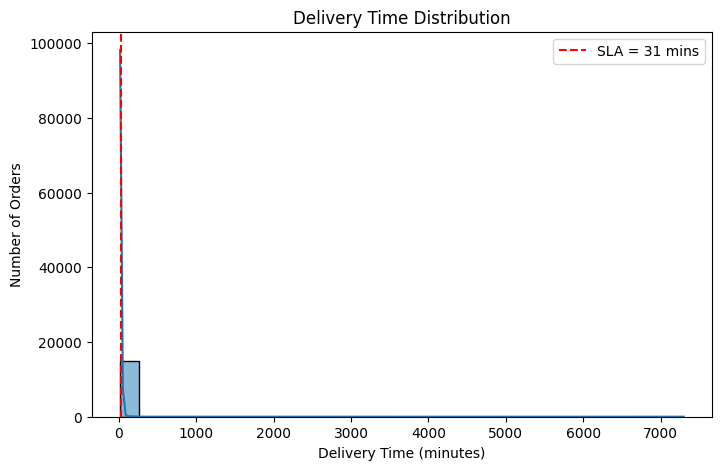

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_time'], bins=30, kde=True)

plt.axvline(31, color='red', linestyle='--', label='SLA = 31 mins')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution")
plt.legend()
plt.show()

- Shows how delivery times are spread
- Red line = SLA limit (31 minutes)

Percentile Analysis

In [17]:
p50 = np.percentile(df['delivery_time'], 50)
p90 = np.percentile(df['delivery_time'], 90)
p95 = np.percentile(df['delivery_time'], 95)
p99 = np.percentile(df['delivery_time'], 99)

print("50th Percentile (Median):", round(p50, 2))
print("90th Percentile:", round(p90, 2))
print("95th Percentile:", round(p95, 2))
print("99th Percentile:", round(p99, 2))

50th Percentile (Median): 15.8
90th Percentile: 21.16
95th Percentile: 27.26
99th Percentile: 65.06


# SLA Check (Business Decision)
- SLA stands for Service Level Agreement.
- An SLA is a formal promise or agreement between a company and its customers that defines:
    - What service will be provided
    - How fast or how well it will be delivered
    - What happens if the service is not met

In [18]:
if p95 < 31:
    print('SLA MET - Franchise is SAFE')
else :
    print('SLA VIOLATED - Risk of Losing Franchise')

SLA MET - Franchise is SAFE


#Late Delivery Analysis

In [19]:
late_orders = df[df['delivery_time'] > 31]

print('Total orders:', len(df))
print('Late orders:', len(late_orders))
print('Late Delivery Percentage:', round(len(late_orders) / len(df) * 100, 2), '%')

Total orders: 15000
Late orders: 557
Late Delivery Percentage: 3.71 %


# Hour - Wise Performance Analysis

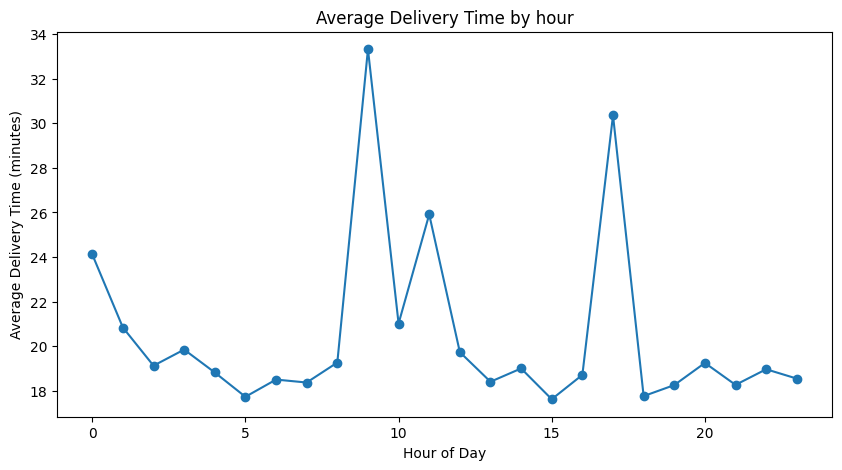

In [20]:
df['order_hour'] = df['order_placed_at'].dt.hour

hourly_avg = df.groupby('order_hour')['delivery_time'].mean()

plt.figure(figsize = (10, 5))
hourly_avg.plot(marker = 'o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('Average Delivery Time by hour')
plt.show()

# Insights from analysis
- Most deliveries are completed within the promised time.
- 95th percentile delivery time is the critical SLA metric.
- Few delayed orders significantly impact the SLA.
- Peak hours show higher delivery time.